In [316]:
!jt -t solarizedl

In [125]:
import sys; print(sys.version)

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('seaborn-darkgrid')
shap.initjs()

from sklearn import preprocessing, metrics


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


import time

%matplotlib inline

3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]


In [7]:
m_D = pd.read_pickle('/Users/liamisaacs/Desktop/github repositories/personalwebsite/data/match_data_version1.pickle')
w_D =  pd.read_pickle('/Users/liamisaacs/Desktop/github repositories/personalwebsite/data/match_winner_data_version1.pickle')
#l_D = pd.read_pickle('/Users/liamisaacs/Desktop/github repositories/personalwebsite/data/match_loser_data_version1.pickle')

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [9]:
#separate target variable from dataframe
df2 = pd.merge(m_D,w_D,on='gameId',how='left')

In [10]:
df2

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio..."
1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio..."
2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio..."
3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,200,Win,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion..."
4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108936,1.579163e+12,1029.0,4.088497e+09,URF,MATCHED_GAME,10.1.303.9385,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN,100,Win,False,True,True,True,True,False,9,2,1,3,0,0,0,[]
108937,1.580823e+12,1544.0,4.130964e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,True,False,False,True,False,False,5,0,1,2,0,0,0,"[{'championId': 89, 'pickTurn': 1}, {'champion..."
108938,1.580382e+12,2090.0,4.119954e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,False,False,False,True,False,False,6,1,2,3,0,1,0,"[{'championId': 105, 'pickTurn': 1}, {'champio..."
108939,1.580805e+12,1382.0,4.130440e+09,URF,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN,100,Win,True,True,True,False,False,False,10,2,0,2,0,0,0,[]


In [11]:
df_d1 = df2

In [334]:
df_d1.drop(columns=['gameType','mapId', 'platformId','seasonId','status.message',
                    'status.status_code','vilemawKills','dominionVictoryScore'], inplace=True)

In [584]:
static_summonerspell_list = watcher.data_dragon.summoner_spells(latest, 'en_US')
summonerspell_dict = {}
for key in static_summonerspell_list['data']:
    row = static_summonerspell_list['data'][key]
    summonerspell_dict[row['key']] = row['id']

In [12]:
df_d1

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio..."
1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio..."
2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio..."
3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,200,Win,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion..."
4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108936,1.579163e+12,1029.0,4.088497e+09,URF,MATCHED_GAME,10.1.303.9385,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN,100,Win,False,True,True,True,True,False,9,2,1,3,0,0,0,[]
108937,1.580823e+12,1544.0,4.130964e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,True,False,False,True,False,False,5,0,1,2,0,0,0,"[{'championId': 89, 'pickTurn': 1}, {'champion..."
108938,1.580382e+12,2090.0,4.119954e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,100,Win,False,False,False,True,False,False,6,1,2,3,0,1,0,"[{'championId': 105, 'pickTurn': 1}, {'champio..."
108939,1.580805e+12,1382.0,4.130440e+09,URF,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN,100,Win,True,True,True,False,False,False,10,2,0,2,0,0,0,[]


In [597]:
_pre_df = pd.DataFrame()
# B = Blue team (teamId == 100); R = Red Team (teamId == 200)
roledict = {
    #avoid autofills, only analyze ppl queing for that role
    'top': {'role': 'TOP'},
    'jg': {'role': 'JUNGLE'},
    'mid': {'role': 'MIDDLE'},
    'adc': {'role': 'BOTTOM'},
    'supp': {'role': 'UTILITY'}
}

summonerspells = ['spell1Id', 'spell2Id']
teams = {'B':'100','R':'200'}
for team, j in teams.items(): #for B, for R
    for key, value in roledict.items():
        _pre_df[str(key)+'_'+str(team)] = df_d1['participants'].map(lambda x: ', '.join(
             #join in champ name
             champ_name_dict[str(i['championId'])]
            
             #for each row
             for i in x
             #only if you're whichever role
             #on whichever team
             if str(list(champion_roles[i['championId']].keys())[0]) == value['role']
             and
             str(i['teamId']) == teams.get(team)
             )                                                                       
        )
        #write summoner spells per role
        for spell in range(0,len(summonerspells)):
            colname = str(key)+'_'+str(summonerspells[spell])+'_'+str(team)
            _pre_df[colname] = df_d1['participants'].map(lambda x: ' '.join(
                str(i[summonerspells[spell]])
                for i in x
                 if str(list(champion_roles[i['championId']].keys())[0]) == value['role']
                 and
                 str(i['teamId']) == teams.get(team)
                 )                                    
       )
#add np.nan instead of ' ' for columns that are blank - indicative that they do not 
#fulfill the if statements above 


In [598]:
col = ['supp_B', 'adc_B', 'mid_B', 'jg_B', 'top_B', 'supp_R', 'adc_R', 'mid_R','jg_R','top_R']
for i in col:
    _pre_df[i].replace('', np.nan, inplace=True)

In [599]:
#add teamId of who won
_pre_df['W'] = df_d1['participants'].map(lambda x: ' '.join(
                                        str(i['teamId'])
                                        for i in x
                                        if str(i['stats']['win']) == 'True'
))
#since the above will add 100 100 100 100 100, when we only want 100, we do
_pre_df['W'] = _pre_df['W'].astype(str).str[0:3]

In [600]:
_pre_df

,top_B,top_spell1Id_B,top_spell2Id_B,jg_B,jg_spell1Id_B,jg_spell2Id_B,mid_B,mid_spell1Id_B,mid_spell2Id_B,adc_B,adc_spell1Id_B,adc_spell2Id_B,supp_B,supp_spell1Id_B,supp_spell2Id_B,top_R,top_spell1Id_R,top_spell2Id_R,jg_R,jg_spell1Id_R,jg_spell2Id_R,mid_R,mid_spell1Id_R,mid_spell2Id_R,adc_R,adc_spell1Id_R,adc_spell2Id_R,supp_R,supp_spell1Id_R,supp_spell2Id_R,W
0,"Aatrox, Sylas",4 4,12 11,NaN,,,Leblanc,1,4,Varus,4,21,Yuumi,3,7,Akali,4,12,RekSai,11,4,Lissandra,4,12,Ezreal,7,4,Senna,1,4,200
1,Maokai,4,12,NaN,,,"Lucian, Ekko",14 11,4 4,Varus,21,4,Yuumi,7,3,"Jayce, Sylas, Renekton",4 4 4,12 11 14,NaN,,,NaN,,,Sivir,4,7,Senna,21,4,100
2,"TahmKench, Renekton",4 12,7 4,Elise,11,4,Viktor,4,12,NaN,,,Senna,4,3,"Kalista, Mordekaiser",3 4,4 12,LeeSin,11,4,Leblanc,14,4,NaN,,,Alistar,14,4,200
3,"Poppy, Shen",4 12,11 4,NaN,,,"Zoe, Lucian",4 4,7 7,NaN,,,Nautilus,4,14,"Sett, Gangplank, Yasuo",14 4 4,4 12 1,Zac,11,4,NaN,,,MissFortune,7,4,NaN,,,200
4,Sett,14,4,Elise,11,4,"Lucian, Anivia",12 4,4 12,Kaisa,4,7,NaN,,,"MonkeyKing, Sylas",4 12,12 4,Olaf,11,4,Zoe,14,4,NaN,,,Yuumi,3,7,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108931,NaN,,,"Karthus, Rammus",12 11,4 4,Katarina,4,14,Caitlyn,7,4,Janna,4,14,Mordekaiser,4,12,Zac,4,11,Zed,14,4,NaN,,,"Ashe, Senna",7 21,4 4,200
108932,Jax,4,12,LeeSin,11,4,NaN,,,Vayne,7,4,"Xerath, Nami",12 4,4 14,Ornn,12,4,NaN,,,Ekko,11,4,Aphelios,4,7,"Zilean, Senna",12 4,4 21,100
108933,Mordekaiser,4,12,Karthus,11,4,Qiyana,14,4,MissFortune,7,4,Thresh,4,14,"Vladimir, Ornn",12 12,4 4,RekSai,11,4,NaN,,,Ezreal,7,4,Nautilus,14,4,100
108937,Jax,4,12,LeeSin,11,4,Kassadin,12,4,Jhin,7,4,Lulu,3,4,"Irelia, Yasuo, Renekton, Volibear",4 3 12 14,12 4 4 4,Nidalee,4,11,NaN,,,NaN,,,NaN,,,100


In [601]:
_ppre_df = _pre_df

In [602]:
_ppre_df = _ppre_df.dropna(subset=['supp_B', 'adc_B', 'mid_B', 'jg_B', 'top_B', 'supp_R', 'adc_R', 'mid_R','jg_R','top_R'])

In [603]:
_ppre_df.sample(10)

,top_B,top_spell1Id_B,top_spell2Id_B,jg_B,jg_spell1Id_B,jg_spell2Id_B,mid_B,mid_spell1Id_B,mid_spell2Id_B,adc_B,adc_spell1Id_B,adc_spell2Id_B,supp_B,supp_spell1Id_B,supp_spell2Id_B,top_R,top_spell1Id_R,top_spell2Id_R,jg_R,jg_spell1Id_R,jg_spell2Id_R,mid_R,mid_spell1Id_R,mid_spell2Id_R,adc_R,adc_spell1Id_R,adc_spell2Id_R,supp_R,supp_spell1Id_R,supp_spell2Id_R,W
60125,Aatrox,4,12,Graves,4,11,Zoe,14,4,Jhin,7,4,Blitzcrank,4,14,Irelia,1,4,Taliyah,11,4,Lucian,4,12,Aphelios,4,7,Thresh,14,4,100
29705,Darius,4,6,RekSai,4,11,Fizz,14,4,Aphelios,7,4,Zyra,4,14,Aatrox,12,4,Graves,11,4,Zoe,4,14,Varus,7,4,Karma,14,4,200
64602,Renekton,12,4,Khazix,4,11,Diana,12,4,Xayah,7,4,Blitzcrank,14,4,DrMundo,12,4,JarvanIV,4,11,Zoe,4,14,Kaisa,7,4,Thresh,14,4,200
7896,Poppy,12,4,Kindred,11,4,Lissandra,4,12,MissFortune,6,4,Yuumi,7,3,Aatrox,12,4,Elise,11,4,Qiyana,14,4,Xayah,7,4,Rakan,4,14,200
27077,Mordekaiser,12,4,LeeSin,11,4,Syndra,7,4,MissFortune,7,4,Blitzcrank,14,4,Irelia,14,4,Karthus,11,4,Lucian,12,4,Kaisa,7,4,Thresh,4,14,100
37976,Pantheon,12,4,Taliyah,11,4,Zoe,14,4,Caitlyn,7,4,Morgana,14,4,Akali,4,12,Nidalee,11,4,Kassadin,4,12,Ezreal,7,4,Bard,14,4,200
64300,Aatrox,12,4,LeeSin,11,4,Azir,4,12,MissFortune,7,4,Senna,21,4,Irelia,12,4,Olaf,4,11,Malzahar,12,4,Aphelios,7,4,Bard,14,4,200
43360,Volibear,12,4,LeeSin,11,4,Leblanc,14,4,MissFortune,1,4,Taric,14,4,Renekton,12,4,Kindred,11,4,Zoe,14,4,Varus,7,4,Morgana,14,4,200
24742,MonkeyKing,12,4,LeeSin,11,4,Lissandra,12,4,Kaisa,3,4,Janna,14,4,Aatrox,12,4,Elise,11,4,Leblanc,1,4,Vayne,4,7,Rakan,4,14,200
67351,Darius,6,4,LeeSin,11,4,Leblanc,4,14,MissFortune,4,1,Nautilus,14,4,Gangplank,12,4,Graves,11,4,Zoe,14,4,Varus,4,7,Braum,14,4,100


In [604]:
_ppre_df

,top_B,top_spell1Id_B,top_spell2Id_B,jg_B,jg_spell1Id_B,jg_spell2Id_B,mid_B,mid_spell1Id_B,mid_spell2Id_B,adc_B,adc_spell1Id_B,adc_spell2Id_B,supp_B,supp_spell1Id_B,supp_spell2Id_B,top_R,top_spell1Id_R,top_spell2Id_R,jg_R,jg_spell1Id_R,jg_spell2Id_R,mid_R,mid_spell1Id_R,mid_spell2Id_R,adc_R,adc_spell1Id_R,adc_spell2Id_R,supp_R,supp_spell1Id_R,supp_spell2Id_R,W
15,Mordekaiser,12,4,JarvanIV,11,4,Lucian,1,4,Aphelios,4,7,Nautilus,4,14,Irelia,4,12,LeeSin,11,4,Zoe,14,4,MissFortune,7,4,Morgana,4,14,200
23,Aatrox,4,12,Nidalee,11,4,Ahri,14,4,Kaisa,7,4,Thresh,4,14,Sett,12,4,Elise,11,4,Talon,4,14,Aphelios,7,4,Nautilus,4,14,200
30,Jax,4,12,LeeSin,11,4,Viktor,4,12,Kaisa,4,7,Nautilus,14,4,Rengar,4,12,Sejuani,4,11,Ekko,12,4,MissFortune,7,4,Yuumi,3,7,100
45,Kayle,12,4,LeeSin,11,4,Zoe,7,4,Varus,4,7,Senna,4,21,Sett,4,12,Elise,11,4,Lucian,14,4,MissFortune,4,7,Blitzcrank,14,4,200
117,Jayce,4,12,LeeSin,11,4,Leblanc,4,14,Varus,7,4,Alistar,4,14,Ornn,4,12,RekSai,11,4,Lissandra,4,12,Sivir,4,21,Yuumi,7,3,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108853,Gangplank,4,12,Olaf,11,4,Fizz,14,4,Aphelios,7,4,Blitzcrank,14,4,Fiora,12,4,LeeSin,11,4,Orianna,4,3,Ezreal,7,4,Thresh,4,14,100
108874,Jax,12,4,Khazix,11,4,Zoe,4,14,Caitlyn,4,7,Xerath,21,4,Aatrox,12,4,RekSai,11,4,Tristana,14,4,Ezreal,4,7,Karma,14,4,200
108894,Gangplank,12,4,Zac,11,4,Katarina,4,14,Ezreal,7,4,Lux,3,4,Darius,6,4,Evelynn,4,11,Fizz,14,4,Jinx,7,4,Pyke,14,4,100
108902,Poppy,12,4,Taliyah,11,4,Diana,12,4,Kaisa,7,4,Bard,14,4,Mordekaiser,4,12,JarvanIV,11,4,Lucian,12,4,MissFortune,7,4,Thresh,4,14,100


In [605]:
x = ['supp_B', 'adc_B', 'mid_B', 'jg_B', 'top_B', 'supp_R', 'adc_R', 'mid_R','jg_R','top_R']
for col in x:
    one_hot = pd.get_dummies(_ppre_df[col], drop_first=True, prefix=col)
    _ppre_df.drop(col,axis = 1)
    _ppre_df = _ppre_df.join(one_hot)

_ppre_df

,top_B,top_spell1Id_B,top_spell2Id_B,jg_B,jg_spell1Id_B,jg_spell2Id_B,mid_B,mid_spell1Id_B,mid_spell2Id_B,adc_B,adc_spell1Id_B,adc_spell2Id_B,supp_B,supp_spell1Id_B,supp_spell2Id_B,top_R,top_spell1Id_R,top_spell2Id_R,jg_R,jg_spell1Id_R,jg_spell2Id_R,mid_R,mid_spell1Id_R,mid_spell2Id_R,adc_R,adc_spell1Id_R,adc_spell2Id_R,supp_R,supp_spell1Id_R,supp_spell2Id_R,W,supp_B_Ashe,supp_B_Bard,supp_B_Blitzcrank,supp_B_Brand,supp_B_Braum,supp_B_Galio,supp_B_Janna,supp_B_Karma,supp_B_Leona,supp_B_Lulu,supp_B_Lux,supp_B_Morgana,supp_B_Nami,supp_B_Nautilus,supp_B_Neeko,supp_B_Pyke,supp_B_Rakan,supp_B_Senna,supp_B_Shaco,supp_B_Sona,supp_B_Soraka,supp_B_Swain,supp_B_Taric,supp_B_Thresh,supp_B_Veigar,supp_B_Velkoz,supp_B_Xerath,supp_B_Yuumi,supp_B_Zilean,supp_B_Zyra,adc_B_Caitlyn,adc_B_Draven,adc_B_Ezreal,adc_B_Jhin,adc_B_Jinx,adc_B_Kaisa,adc_B_MissFortune,adc_B_Sivir,adc_B_Varus,adc_B_Vayne,adc_B_Xayah,mid_B_Anivia,mid_B_Annie,mid_B_AurelionSol,mid_B_Azir,mid_B_Corki,mid_B_Diana,mid_B_Ekko,mid_B_Fizz,mid_B_Kassadin,mid_B_Katarina,mid_B_KogMaw,mid_B_Leblanc,mid_B_Lissandra,mid_B_Lucian,mid_B_Malzahar,mid_B_Orianna,mid_B_Qiyana,mid_B_Syndra,mid_B_Talon,mid_B_Tristana,mid_B_TwistedFate,mid_B_Viktor,mid_B_Zed,mid_B_Ziggs,mid_B_Zoe,jg_B_Elise,jg_B_Evelynn,jg_B_Fiddlesticks,jg_B_Graves,jg_B_Hecarim,jg_B_Ivern,jg_B_JarvanIV,jg_B_Karthus,jg_B_Kayn,jg_B_Khazix,jg_B_Kindred,jg_B_LeeSin,jg_B_MasterYi,jg_B_Nidalee,jg_B_Nocturne,jg_B_Nunu,jg_B_Olaf,jg_B_Rammus,jg_B_RekSai,jg_B_Sejuani,jg_B_Shyvana,jg_B_Skarner,jg_B_Taliyah,jg_B_Udyr,jg_B_Vi,jg_B_XinZhao,jg_B_Zac,top_B_Akali,top_B_Camille,top_B_Cassiopeia,top_B_Chogath,top_B_Darius,top_B_DrMundo,top_B_Fiora,top_B_Gangplank,top_B_Garen,top_B_Gnar,top_B_Gragas,top_B_Heimerdinger,top_B_Illaoi,top_B_Irelia,top_B_Jax,top_B_Jayce,top_B_Kalista,top_B_Kayle,top_B_Kennen,top_B_Kled,top_B_Malphite,top_B_Maokai,top_B_MonkeyKing,top_B_Mordekaiser,top_B_Nasus,top_B_Ornn,top_B_Pantheon,top_B_Poppy,top_B_Quinn,top_B_Renekton,top_B_Rengar,top_B_Riven,top_B_Rumble,top_B_Ryze,top_B_Sett,top_B_Shen,top_B_Singed,top_B_Sion,top_B_Sylas,top_B_TahmKench,top_B_Teemo,top_B_Trundle,top_B_Tryndamere,top_B_Urgot,top_B_Vladimir,top_B_Volibear,top_B_Warwick,top_B_Yasuo,top_B_Yorick,supp_R_Ashe,supp_R_Bard,supp_R_Blitzcrank,supp_R_Brand,supp_R_Braum,supp_R_Galio,supp_R_Janna,supp_R_Karma,supp_R_Leona,supp_R_Lulu,supp_R_Lux,supp_R_Morgana,supp_R_Nami,supp_R_Nautilus,supp_R_Neeko,supp_R_Pyke,supp_R_Rakan,supp_R_Senna,supp_R_Shaco,supp_R_Sona,supp_R_Soraka,supp_R_Swain,supp_R_Taric,supp_R_Thresh,supp_R_Veigar,supp_R_Velkoz,supp_R_Xerath,supp_R_Yuumi,supp_R_Zilean,supp_R_Zyra,adc_R_Caitlyn,adc_R_Draven,adc_R_Ezreal,adc_R_Jhin,adc_R_Jinx,adc_R_Kaisa,adc_R_MissFortune,adc_R_Sivir,adc_R_Varus,adc_R_Vayne,adc_R_Xayah,mid_R_Anivia,mid_R_Annie,mid_R_AurelionSol,mid_R_Azir,mid_R_Corki,mid_R_Diana,mid_R_Ekko,mid_R_Fizz,mid_R_Kassadin,mid_R_Katarina,mid_R_Leblanc,mid_R_Lissandra,mid_R_Lucian,mid_R_Malzahar,mid_R_Orianna,mid_R_Qiyana,mid_R_Syndra,mid_R_Talon,mid_R_Tristana,mid_R_TwistedFate,mid_R_Viktor,mid_R_Zed,mid_R_Ziggs,mid_R_Zoe,jg_R_Elise,jg_R_Evelynn,jg_R_Fiddlesticks,jg_R_Graves,jg_R_Hecarim,jg_R_Ivern,jg_R_JarvanIV,jg_R_Karthus,jg_R_Kayn,jg_R_Khazix,jg_R_Kindred,jg_R_LeeSin,jg_R_MasterYi,jg_R_Nidalee,jg_R_Nocturne,jg_R_Nunu,jg_R_Olaf,jg_R_Rammus,jg_R_RekSai,jg_R_Sejuani,jg_R_Shyvana,jg_R_Skarner,jg_R_Taliyah,jg_R_Udyr,jg_R_Vi,jg_R_XinZhao,jg_R_Zac,top_R_Akali,top_R_Camille,top_R_Cassiopeia,top_R_Chogath,top_R_Darius,top_R_DrMundo,top_R_Fiora,top_R_Gangplank,top_R_Garen,top_R_Gnar,top_R_Gragas,top_R_Heimerdinger,top_R_Illaoi,top_R_Irelia,top_R_Jax,top_R_Jayce,top_R_Kalista,top_R_Kayle,top_R_Kennen,top_R_Kled,top_R_Malphite,top_R_Maokai,top_R_MonkeyKing,top_R_Mordekaiser,top_R_Nasus,top_R_Ornn,top_R_Pantheon,top_R_Poppy,top_R_Quinn,top_R_Renekton,top_R_Rengar,top_R_Riven,top_R_Rumble,top_R_Ryze,top_R_Sett,top_R_Shen,top_R_Singed,top_R_Sion,top_R_Sylas,top_R_TahmKench,top_R_Teemo,top_R_Trundle,top_R_Tryndamere,top_R_Urgot,top_R_Vladimir,top_R_

In [544]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [607]:
gbt_ppre_df = _ppre_df
target = gbt_ppre_df['W']
gbt_ppre_df = gbt_ppre_df.drop(columns=['W', 'top_B', 'jg_B', 'mid_B', 'top_B', 'top_spell1Id_B', 'top_spell2Id_B',
                         'top_B', 'top_spell1Id_B', 'top_spell2Id_B',
                          'jg_B', 'jg_spell1Id_B', 'jg_spell2Id_B',
                          'mid_B', 'mid_spell1Id_B', 'mid_spell2Id_B',
                          'adc_B', 'adc_spell1Id_B', 'adc_spell2Id_B',
                          'supp_B', 'supp_spell1Id_B', 'supp_spell2Id_B',
                          'top_R', 'top_spell1Id_R', 'top_spell2Id_R',
                          'jg_R', 'jg_spell1Id_R', 'jg_spell2Id_R',
                          'mid_R', 'mid_spell1Id_R', 'mid_spell2Id_R', 
                          'adc_R', 'adc_spell1Id_R', 'adc_spell2Id_R', 
                          'supp_R', 'supp_spell1Id_R', 'supp_spell2Id_R'
                         ])
gbt_ppre_df

,supp_B_Ashe,supp_B_Bard,supp_B_Blitzcrank,supp_B_Brand,supp_B_Braum,supp_B_Galio,supp_B_Janna,supp_B_Karma,supp_B_Leona,supp_B_Lulu,supp_B_Lux,supp_B_Morgana,supp_B_Nami,supp_B_Nautilus,supp_B_Neeko,supp_B_Pyke,supp_B_Rakan,supp_B_Senna,supp_B_Shaco,supp_B_Sona,supp_B_Soraka,supp_B_Swain,supp_B_Taric,supp_B_Thresh,supp_B_Veigar,supp_B_Velkoz,supp_B_Xerath,supp_B_Yuumi,supp_B_Zilean,supp_B_Zyra,adc_B_Caitlyn,adc_B_Draven,adc_B_Ezreal,adc_B_Jhin,adc_B_Jinx,adc_B_Kaisa,adc_B_MissFortune,adc_B_Sivir,adc_B_Varus,adc_B_Vayne,adc_B_Xayah,mid_B_Anivia,mid_B_Annie,mid_B_AurelionSol,mid_B_Azir,mid_B_Corki,mid_B_Diana,mid_B_Ekko,mid_B_Fizz,mid_B_Kassadin,mid_B_Katarina,mid_B_KogMaw,mid_B_Leblanc,mid_B_Lissandra,mid_B_Lucian,mid_B_Malzahar,mid_B_Orianna,mid_B_Qiyana,mid_B_Syndra,mid_B_Talon,mid_B_Tristana,mid_B_TwistedFate,mid_B_Viktor,mid_B_Zed,mid_B_Ziggs,mid_B_Zoe,jg_B_Elise,jg_B_Evelynn,jg_B_Fiddlesticks,jg_B_Graves,jg_B_Hecarim,jg_B_Ivern,jg_B_JarvanIV,jg_B_Karthus,jg_B_Kayn,jg_B_Khazix,jg_B_Kindred,jg_B_LeeSin,jg_B_MasterYi,jg_B_Nidalee,jg_B_Nocturne,jg_B_Nunu,jg_B_Olaf,jg_B_Rammus,jg_B_RekSai,jg_B_Sejuani,jg_B_Shyvana,jg_B_Skarner,jg_B_Taliyah,jg_B_Udyr,jg_B_Vi,jg_B_XinZhao,jg_B_Zac,top_B_Akali,top_B_Camille,top_B_Cassiopeia,top_B_Chogath,top_B_Darius,top_B_DrMundo,top_B_Fiora,top_B_Gangplank,top_B_Garen,top_B_Gnar,top_B_Gragas,top_B_Heimerdinger,top_B_Illaoi,top_B_Irelia,top_B_Jax,top_B_Jayce,top_B_Kalista,top_B_Kayle,top_B_Kennen,top_B_Kled,top_B_Malphite,top_B_Maokai,top_B_MonkeyKing,top_B_Mordekaiser,top_B_Nasus,top_B_Ornn,top_B_Pantheon,top_B_Poppy,top_B_Quinn,top_B_Renekton,top_B_Rengar,top_B_Riven,top_B_Rumble,top_B_Ryze,top_B_Sett,top_B_Shen,top_B_Singed,top_B_Sion,top_B_Sylas,top_B_TahmKench,top_B_Teemo,top_B_Trundle,top_B_Tryndamere,top_B_Urgot,top_B_Vladimir,top_B_Volibear,top_B_Warwick,top_B_Yasuo,top_B_Yorick,supp_R_Ashe,supp_R_Bard,supp_R_Blitzcrank,supp_R_Brand,supp_R_Braum,supp_R_Galio,supp_R_Janna,supp_R_Karma,supp_R_Leona,supp_R_Lulu,supp_R_Lux,supp_R_Morgana,supp_R_Nami,supp_R_Nautilus,supp_R_Neeko,supp_R_Pyke,supp_R_Rakan,supp_R_Senna,supp_R_Shaco,supp_R_Sona,supp_R_Soraka,supp_R_Swain,supp_R_Taric,supp_R_Thresh,supp_R_Veigar,supp_R_Velkoz,supp_R_Xerath,supp_R_Yuumi,supp_R_Zilean,supp_R_Zyra,adc_R_Caitlyn,adc_R_Draven,adc_R_Ezreal,adc_R_Jhin,adc_R_Jinx,adc_R_Kaisa,adc_R_MissFortune,adc_R_Sivir,adc_R_Varus,adc_R_Vayne,adc_R_Xayah,mid_R_Anivia,mid_R_Annie,mid_R_AurelionSol,mid_R_Azir,mid_R_Corki,mid_R_Diana,mid_R_Ekko,mid_R_Fizz,mid_R_Kassadin,mid_R_Katarina,mid_R_Leblanc,mid_R_Lissandra,mid_R_Lucian,mid_R_Malzahar,mid_R_Orianna,mid_R_Qiyana,mid_R_Syndra,mid_R_Talon,mid_R_Tristana,mid_R_TwistedFate,mid_R_Viktor,mid_R_Zed,mid_R_Ziggs,mid_R_Zoe,jg_R_Elise,jg_R_Evelynn,jg_R_Fiddlesticks,jg_R_Graves,jg_R_Hecarim,jg_R_Ivern,jg_R_JarvanIV,jg_R_Karthus,jg_R_Kayn,jg_R_Khazix,jg_R_Kindred,jg_R_LeeSin,jg_R_MasterYi,jg_R_Nidalee,jg_R_Nocturne,jg_R_Nunu,jg_R_Olaf,jg_R_Rammus,jg_R_RekSai,jg_R_Sejuani,jg_R_Shyvana,jg_R_Skarner,jg_R_Taliyah,jg_R_Udyr,jg_R_Vi,jg_R_XinZhao,jg_R_Zac,top_R_Akali,top_R_Camille,top_R_Cassiopeia,top_R_Chogath,top_R_Darius,top_R_DrMundo,top_R_Fiora,top_R_Gangplank,top_R_Garen,top_R_Gnar,top_R_Gragas,top_R_Heimerdinger,top_R_Illaoi,top_R_Irelia,top_R_Jax,top_R_Jayce,top_R_Kalista,top_R_Kayle,top_R_Kennen,top_R_Kled,top_R_Malphite,top_R_Maokai,top_R_MonkeyKing,top_R_Mordekaiser,top_R_Nasus,top_R_Ornn,top_R_Pantheon,top_R_Poppy,top_R_Quinn,top_R_Renekton,top_R_Rengar,top_R_Riven,top_R_Rumble,top_R_Ryze,top_R_Sett,top_R_Shen,top_R_Singed,top_R_Sion,top_R_Sylas,top_R_TahmKench,top_R_Teemo,top_R_Trundle,top_R_Tryndamere,top_R_Urgot,top_R_Vladimir,top_R_Volibear,top_R_Warwick,top_R_Yasuo,top_R_Yorick
15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [608]:
# X_train, X_test, y_train, y_test = train_test_split(gbt_ppre_df, 
#                                                     target, 
#                                                     random_state=42, 
#                                                     test_size=0.1)


In [609]:
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# gbr_params = {'n_estimators': 1000,
#           'max_depth': 3,
#           'min_samples_split': 5,
#           'learning_rate': 0.01,
#           'loss': 'ls'}

# gbr = GradientBoostingRegressor(**gbr_params)

# gbr.fit(X_train_std, y_train)

# print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

# mse = mean_squared_error(y_test, gbr.predict(X_test_std))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.004
The mean squared error (MSE) on test set: 2490.1814


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(gbt_ppre_df)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

/Users/liamisaacs/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Pregame data was an absolute failure. Moving on to post-game analysis

In [192]:
df_d2 = df_d1.copy()
df_d2 = df_d2[df_d2['queueId'] == 420]

In [193]:
_post_df = pd.DataFrame()

In [194]:
j = ['kills', 
     'deaths', 'assists', 'largestKillingSpree', 'largestMultiKill', 'killingSprees', 
     'longestTimeSpentLiving', 'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills', 
     'totalDamageDealt', 'magicDamageDealt', 'physicalDamageDealt', 'trueDamageDealt', 
     'largestCriticalStrike', 'totalDamageDealtToChampions', 'magicDamageDealtToChampions', 
     'physicalDamageDealtToChampions', 'trueDamageDealtToChampions', 'totalHeal', 
     'totalUnitsHealed', 'damageSelfMitigated', 'damageDealtToObjectives', 'damageDealtToTurrets',
     'visionScore', 'timeCCingOthers', 'totalDamageTaken', 'magicalDamageTaken', 
     'physicalDamageTaken', 'trueDamageTaken', 'goldEarned', 'goldSpent', 'turretKills', 
     'inhibitorKills', 'totalMinionsKilled', 'neutralMinionsKilled', 'neutralMinionsKilledTeamJungle',
     'neutralMinionsKilledEnemyJungle', 'totalTimeCrowdControlDealt', 'champLevel', 
     'visionWardsBoughtInGame', 'wardsPlaced', 'wardsKilled', 
     'firstBloodKill', 'firstBloodAssist', 'firstTowerKill', 'firstTowerAssist', 
     'firstInhibitorKill', 'firstInhibitorAssist']
for col in j:
    _post_df[col] = df_d2['participants'].map(lambda x:
          ''.join(str(i['stats'][col]) for i in x  if i['participantId'] == 1 and col in i['stats']
                  )
                )

In [195]:
_post_df

,kills,deaths,assists,largestKillingSpree,largestMultiKill,killingSprees,longestTimeSpentLiving,doubleKills,tripleKills,quadraKills,pentaKills,totalDamageDealt,magicDamageDealt,physicalDamageDealt,trueDamageDealt,largestCriticalStrike,totalDamageDealtToChampions,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalUnitsHealed,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,visionScore,timeCCingOthers,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,trueDamageTaken,goldEarned,goldSpent,turretKills,inhibitorKills,totalMinionsKilled,neutralMinionsKilled,neutralMinionsKilledTeamJungle,neutralMinionsKilledEnemyJungle,totalTimeCrowdControlDealt,champLevel,visionWardsBoughtInGame,wardsPlaced,wardsKilled,firstBloodKill,firstBloodAssist,firstTowerKill,firstTowerAssist,firstInhibitorKill,firstInhibitorAssist
0,3,6,3,2,1,1,564,0,0,0,0,71369,56332,13037,1999,0,10844,8926,1918,0,4006,1,6742,1055,1008,14,12,17255,5282,11203,770,6844,6710,0,0,133,0,0,0,19,12,3,6,1,True,False,False,False,False,False
1,3,5,2,2,1,1,351,0,0,0,0,91081,3316,83719,4045,0,16662,916,15033,712,1267,1,5791,1885,1885,14,1,15543,4239,10620,684,8452,7900,1,0,166,4,0,4,33,14,4,11,1,False,False,False,False,,
2,0,4,1,0,0,0,354,0,0,0,0,19098,0,17614,1483,1483,5167,0,5167,0,2119,2,2996,1600,0,14,19,6494,1789,4506,198,3228,3000,0,0,11,0,0,0,82,7,2,9,1,False,False,False,False,False,False
3,4,9,11,2,1,1,457,0,0,0,0,35821,16894,11345,7581,0,10158,6337,2176,1644,2673,1,61798,1021,68,84,74,27058,4996,17835,4226,9592,9475,0,0,52,0,0,0,377,14,11,58,9,False,False,False,False,,
4,7,12,12,2,1,1,377,0,0,0,0,269340,41262,224449,3628,782,36749,8910,26824,1014,8355,3,19728,26607,8067,21,4,33275,13606,16527,3142,18545,20205,2,1,223,59,45,10,114,17,1,9,8,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108931,3,4,2,2,1,1,486,0,0,0,0,35236,2129,32817,289,507,7965,484,7190,289,1530,3,3474,805,805,7,5,8348,541,7536,270,5286,5100,0,0,84,0,0,0,19,8,0,4,1,False,False,False,False,,
108932,3,0,8,3,1,1,0,0,0,0,0,108404,99712,8692,0,0,19457,19027,430,0,321,1,2968,4823,1674,20,15,7025,3157,3838,30,9522,9125,2,1,159,8,8,0,154,14,1,8,1,False,False,False,False,False,False
108933,0,2,8,0,0,0,270,0,0,0,0,12848,6209,3687,2950,0,2844,2179,461,203,196,5,3439,964,964,22,20,3788,362,3196,229,4793,4275,0,0,25,0,0,0,55,8,3,10,2,False,False,False,False,False,True
108937,0,4,3,0,0,0,510,0,0,0,0,96825,9198,87627,0,911,3497,276,3220,0,1475,2,3598,8673,2659,14,12,8032,1727,5994,310,8268,7075,1,0,178,4,0,0,120,12,1,9,1,False,False,False,False,,


In [197]:
_df = _post_df.copy()

In [205]:
#add in win
_df['win'] = df_d2['participants'].map(lambda x:
                                          ' '.join(str(i['stats']['win']) for i in x
                                                      if i['participantId'] == 1 
                                                      ))

In [199]:
#merge in game duration (so we can use rates)
game_dur = df_d1['gameDuration'] #game_dur is a pandas Series
_df = pd.concat([_post_df, game_dur], axis=1)
_df.dropna(inplace=True)

In [207]:
#replace True/False with 1/0
t_f_col = ['win']
binary_t_f_col = ['firstBloodKill', 'firstTowerKill', 'firstBloodAssist',
          'firstTowerAssist', 'firstInhibitorKill', 'firstInhibitorAssist']
for col in t_f_col:
    _df[col].replace({'False': False, 'True': True}, inplace=True)
for col in binary_t_f_col:
    _df[col].replace({'False': 0, 'True': 1}, inplace=True)

In [208]:
#sometimes blank, fill w/ 0 (assume they are supposed to be 'False')
convert = ['firstBloodKill', 'firstTowerKill', 'firstBloodAssist',
          'firstTowerAssist', 'firstInhibitorKill', 'firstInhibitorAssist']
for col in convert:
    _df[col].replace('', np.nan, inplace=True)
    _df[col].fillna(False, inplace=True)


In [209]:
df = _df.copy()

In [270]:
df
liamgg_data = df.to_csv('liamgg_data.csv', index = True) 

In [211]:
X_ = df.drop(["win"], axis=1)
y_ = df["win"]

#Convert all columns to numbers
for col in list(X_.columns):
    X_[col] = pd.to_numeric(X_[col])

In [212]:
X_

,kills,deaths,assists,largestKillingSpree,largestMultiKill,killingSprees,longestTimeSpentLiving,doubleKills,tripleKills,quadraKills,pentaKills,totalDamageDealt,magicDamageDealt,physicalDamageDealt,trueDamageDealt,largestCriticalStrike,totalDamageDealtToChampions,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalUnitsHealed,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,visionScore,timeCCingOthers,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,trueDamageTaken,goldEarned,goldSpent,turretKills,inhibitorKills,totalMinionsKilled,neutralMinionsKilled,neutralMinionsKilledTeamJungle,neutralMinionsKilledEnemyJungle,totalTimeCrowdControlDealt,champLevel,visionWardsBoughtInGame,wardsPlaced,wardsKilled,firstBloodKill,firstBloodAssist,firstTowerKill,firstTowerAssist,firstInhibitorKill,firstInhibitorAssist,gameDuration
0,3,6,3,2,1,1,564,0,0,0,0,71369,56332,13037,1999,0,10844,8926,1918,0,4006,1,6742,1055,1008,14,12,17255,5282,11203,770,6844,6710,0,0,133,0,0,0,19,12,3,6,1,1.0,0.0,0.0,0.0,0.0,0.0,1323.0
1,3,5,2,2,1,1,351,0,0,0,0,91081,3316,83719,4045,0,16662,916,15033,712,1267,1,5791,1885,1885,14,1,15543,4239,10620,684,8452,7900,1,0,166,4,0,4,33,14,4,11,1,0.0,0.0,0.0,0.0,0.0,0.0,1317.0
2,0,4,1,0,0,0,354,0,0,0,0,19098,0,17614,1483,1483,5167,0,5167,0,2119,2,2996,1600,0,14,19,6494,1789,4506,198,3228,3000,0,0,11,0,0,0,82,7,2,9,1,0.0,0.0,0.0,0.0,0.0,0.0,932.0
3,4,9,11,2,1,1,457,0,0,0,0,35821,16894,11345,7581,0,10158,6337,2176,1644,2673,1,61798,1021,68,84,74,27058,4996,17835,4226,9592,9475,0,0,52,0,0,0,377,14,11,58,9,0.0,0.0,0.0,0.0,0.0,0.0,2098.0
4,7,12,12,2,1,1,377,0,0,0,0,269340,41262,224449,3628,782,36749,8910,26824,1014,8355,3,19728,26607,8067,21,4,33275,13606,16527,3142,18545,20205,2,1,223,59,45,10,114,17,1,9,8,1.0,0.0,0.0,0.0,0.0,0.0,2344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108931,3,4,2,2,1,1,486,0,0,0,0,35236,2129,32817,289,507,7965,484,7190,289,1530,3,3474,805,805,7,5,8348,541,7536,270,5286,5100,0,0,84,0,0,0,19,8,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,934.0
108932,3,0,8,3,1,1,0,0,0,0,0,108404,99712,8692,0,0,19457,19027,430,0,321,1,2968,4823,1674,20,15,7025,3157,3838,30,9522,9125,2,1,159,8,8,0,154,14,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,1418.0
108933,0,2,8,0,0,0,270,0,0,0,0,12848,6209,3687,2950,0,2844,2179,461,203,196,5,3439,964,964,22,20,3788,362,3196,229,4793,4275,0,0,25,0,0,0,55,8,3,10,2,0.0,0.0,0.0,0.0,0.0,1.0,933.0
108937,0,4,3,0,0,0,510,0,0,0,0,96825,9198,87627,0,911,3497,276,3220,0,1475,2,3598,8673,2659,14,12,8032,1727,5994,310,8268,7075,1,0,178,4,0,0,120,12,1,9,1,0.0,0.0,0.0,0.0,0.0,0.0,1544.0


In [214]:
#Define features we want to convert to rates
rate_features = [
    "kills", "deaths", "assists", "killingSprees", "doubleKills",
    "tripleKills", "quadraKills", "pentaKills", 
    "totalDamageDealt", "magicDamageDealtToChampions", "physicalDamageDealt", "trueDamageDealt",
    "totalDamageDealtToChampions", "magicDamageDealtToChampions", "physicalDamageDealtToChampions", "trueDamageDealtToChampions",
    "trueDamageDealtToChampions", "magicDamageDealt",
    "totalHeal", "totalUnitsHealed", "damageDealtToObjectives", "timeCCingOthers", "totalDamageTaken",
    "magicalDamageTaken" , "physicalDamageTaken", "trueDamageTaken", "goldEarned", "goldSpent",
    "totalMinionsKilled", "neutralMinionsKilled", "neutralMinionsKilledTeamJungle",
    "neutralMinionsKilledEnemyJungle", "totalTimeCrowdControlDealt", "visionWardsBoughtInGame", 
    "wardsPlaced", "wardsKilled"
]

#Convery rate features to per minute rates of the game
for feature_name in rate_features:
    X_[feature_name] /= X_["gameDuration"] / 60 # per minute rate
    
X_["longestTimeSpentLiving"] /= X_["gameDuration"]

# Define friendly names for the features
full_names = {
    "kills": "Kills per min.",
    "deaths": "Deaths per min.",
    "assists": "Assists per min.",
    "killingSprees": "Killing sprees per min.",
    "longestTimeSpentLiving": "Longest time living as % of game",
    "doubleKills": "Double kills per min.",
    "tripleKills": "Triple kills per min.",
    "quadraKills": "Quadra kills per min.",
    "pentaKills": "Penta kills per min.",
    "totalDamageDealt": "Total damage dealt per min.",
    "magicDamageDealt": "Magic damage dealt per min.",
    "physicalDamageDealt": "Physical damage dealt per min.",
    "trueDamageDealt": "True damage dealt per min.",
    "totalDamageDealtToChampions": "Total damage to champions per min.",
    "magicDamageDealtToChampions": "Magic damage to champions per min.",
    "physicalDamageDealtToChampions": "Physical damage to champions per min.",
    "trueDamageDealtToChampions": "True damage to champions per min.",
    "totalHeal": "Total healing per min.",
    "totalUnitsHealed": "Total units healed per min.",
    "damageDealtToObjectives": "Damage to objects per min.",
    "timeCCingOthers": "Time spent with crown control per min.",
    "totalDamageTaken": "Total damage taken per min.",
    "magicalDamageTaken": "Magic damage taken per min.",
    "physicalDamageTaken": "Physical damage taken per min.",
    "trueDamageTaken": "True damage taken per min.",
    "goldEarned": "Gold earned per min.",
    "goldSpent": "Gold spent per min.",
    "totalMinionsKilled": "Total minions killed per min.",
    "neutralMinionsKilled": "Neutral minions killed per min.",
    "neutralMinionsKilledTeamJungle": "Own jungle kills per min.",
    "neutralMinionsKilledEnemyJungle": "Enemy jungle kills per min.",
    "totalTimeCrowdControlDealt": "Total crown control time dealt per min.",
    "visionWardsBoughtInGame": "Pink wards bought per min.",
    "wardsPlaced": "Wards placed per min.",
    "wardsKilled": "Wards killed per min.",
    "turretKills": "# of turret kills",
    "inhibitorKills": "# of inhibitor kills",
    "damageDealtToTurrets": "Damage to turrets"
}
#Replace columns with nicer names
feature_names = [full_names.get(n, n) for n in X_.columns]
X_.columns = feature_names

In [380]:
# create train/validation split
Xt, Xv, yt, yv = train_test_split(X_,y_, test_size=0.2, random_state=10)

In [217]:
#Check null values
Xt.isnull().values.any()

False

In [218]:
Xt.sample(10)

,Kills per min.,Deaths per min.,Assists per min.,largestKillingSpree,largestMultiKill,Killing sprees per min.,Longest time living as % of game,Double kills per min.,Triple kills per min.,Quadra kills per min.,Penta kills per min.,Total damage dealt per min.,Magic damage dealt per min.,Physical damage dealt per min.,True damage dealt per min.,largestCriticalStrike,Total damage to champions per min.,Magic damage to champions per min.,Physical damage to champions per min.,True damage to champions per min.,Total healing per min.,Total units healed per min.,damageSelfMitigated,Damage to objects per min.,Damage to turrets,visionScore,Time spent with crown control per min.,Total damage taken per min.,Magic damage taken per min.,Physical damage taken per min.,True damage taken per min.,Gold earned per min.,Gold spent per min.,# of turret kills,# of inhibitor kills,Total minions killed per min.,Neutral minions killed per min.,Own jungle kills per min.,Enemy jungle kills per min.,Total crown control time dealt per min.,champLevel,Pink wards bought per min.,Wards placed per min.,Wards killed per min.,firstBloodKill,firstBloodAssist,firstTowerKill,firstTowerAssist,firstInhibitorKill,firstInhibitorAssist,gameDuration
4649,0.005619,0.002809,0.008428,0,1,0.000000,0.169611,0.000000,0.0,0.0,0.0,162.825731,132.846895,25.318084,4.655134,0,19.699334,0.041657,2.705428,0.006077,7.885914,0.005619,2636,7.318421,2605,15,0.039331,20.966362,2.969509,17.440597,0.556256,18.960469,17.375982,1,0,0.359600,0.000000,0.000000,0.000000,0.151706,11,0.005619,0.371025,0.106007,0.0,0.0,0.0,0.0,0.0,1.0,1132.0
49767,0.002885,0.000000,0.011541,0,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,230.875803,0.000000,215.453691,15.422112,0,28.238768,0.000000,28.238768,0.000000,18.774871,0.002885,7026,21.299539,787,10,0.060592,41.554586,13.284080,28.267621,0.000000,21.432264,17.889073,0,0,0.461654,0.011541,0.000000,0.000000,0.352011,13,0.000000,0.322292,0.053715,0.0,0.0,0.0,0.0,0.0,0.0,1117.0
46558,0.007375,0.003278,0.005736,6,2,0.001639,0.487118,0.000819,0.0,0.0,0.0,95.339177,80.998886,8.553370,5.786103,0,18.385893,0.013540,0.476917,0.001135,8.148564,0.000819,16288,10.974830,670,40,0.019667,22.145508,4.853574,15.491613,1.798682,9.613732,8.296883,0,0,0.117181,0.013111,0.009833,0.000000,0.281889,16,0.002458,0.429389,0.229008,0.0,0.0,0.0,0.0,0.0,0.0,2096.0
33301,0.005514,0.022057,0.005514,0,1,0.000000,0.372525,0.000000,0.0,0.0,0.0,33.823890,6.738310,12.131164,14.948902,0,7.653661,0.015994,3.319527,0.007906,0.000000,0.000000,4536,0.000000,0,10,0.066170,40.269949,17.496446,21.466645,1.301343,15.516861,12.406872,0,0,0.071684,0.000000,0.000000,0.000000,0.082712,6,0.022057,0.445545,0.148515,0.0,0.0,0.0,0.0,0.0,0.0,808.0
69092,0.007517,0.006443,0.005369,3,2,0.002148,0.209175,0.001074,0.0,0.0,0.0,176.091293,102.208073,12.815874,61.067345,0,19.352131,0.014075,1.772854,0.004800,3.429736,0.001074,7258,8.068578,4884,20,0.034362,18.373894,2.730689,15.292071,0.350061,13.538546,12.375614,1,1,0.222278,0.008590,0.004295,0.004295,0.252344,16,0.004295,0.262152,0.098307,0.0,0.0,0.0,0.0,0.0,0.0,1831.0
27601,0.015496,0.003874,0.015496,3,1,0.003874,0.681535,0.000000,0.0,0.0,0.0,203.526971,17.564264,175.867323,10.091510,0,29.313803,0.033811,20.585906,0.000000,1.386856,0.003874,1798,7.081490,1828,11,0.000000,14.550369,3.730566,9.917185,0.898745,25.412786,19.272654,0,0,0.499733,0.015496,0.000000,0.015496,0.000000,10,0.003874,0.311203,0.124481,0.0,0.0,0.0,0.0,0.0,0.0,964.0
28289,0.004217,0.025299,0.012650,0,1,0.000000,0.374459,0.000000,0.0,0.0,0.0,139.901332,80.232754,40.909091,18.755271,0,27.926294,0.097378,4.545455,0.001209,3.187721,0.004217,2740,0.978243,232,7,0.029516,42.405971,5.144206,35.629954,1.627593,19.666048,16.065104,0,0,0.383707,0.000000,0.000000,0.000000,0.033733,9,0.004217,0.324675,0.064935,0.0,0.0,0.0,0.0,0.0,0.0,924.0
54046,0.008442,0.005065,0.007598,4,2,0.002533,0.289104,0.000844,0.0,0.0,0.0,148.000821,116.502483,18.675281,12.822213,0,14.547825,0.010242,1.272259,0.000965,20.816256,0.004221,1

In [271]:
print("# of observations in X_train dataset: ",Xt.shape)
print("# of observations in y_train dataset: ",yt.shape)
print("# of observations in X_val dataset: ", Xv.shape)
print("# of observations in y_val dataset: ", yv.shape)

# of observations in X_train dataset:  (62537, 51)
# of observations in y_train dataset:  (62537,)
# of observations in X_val dataset:  (15635, 51)
# of observations in y_val dataset:  (15635,)


### RF Classifier

Hypertune RF model

In [239]:
from sklearn.model_selection import cross_val_score

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from timeit import default_timer as timer
rf = RandomForestClassifier()

#use grid search to find best parameters
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]   
}

cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(Xt,yt.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [225]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [226]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 250}


0.802 + or -0.02 for the {'max_depth': 2, 'n_estimators': 5}
0.812 + or -0.011 for the {'max_depth': 2, 'n_estimators': 10}
0.837 + or -0.004 for the {'max_depth': 2, 'n_estimators': 50}
0.844 + or -0.003 for the {'max_depth': 2, 'n_estimators': 100}
0.843 + or -0.002 for the {'max_depth': 2, 'n_estimators': 250}
0.849 + or -0.003 for the {'max_depth': 4, 'n_estimators': 5}
0.85 + or -0.002 for the {'max_depth': 4, 'n_estimators': 10}
0.863 + or -0.004 for the {'max_depth': 4, 'n_estimators': 50}
0.864 + or -0.003 for the {'max_depth': 4, 'n_estimators': 100}
0.865 + or -0.002 for the {'max_depth': 4, 'n_estimators': 250}
0.869 + or -0.004 for the {'max_depth': 8, 'n_estimators': 5}
0.878 + or -0.004 for the {'max_depth': 8, 'n_estimators': 10}
0.883 + or -0.003 for the {'max_depth': 8, 'n_estimators': 50}
0.884 + or -0.003 for the {'max_depth': 8, 'n_estimators': 100}
0.885 + or -0.003 for the {'max_depth': 8, 'n_estimato

Run RF model with best hyperparameters

In [227]:
#run model
ntrees = 250
rf = RandomForestClassifier(n_estimators=ntrees, 
                            n_jobs=-1,
                            max_depth=None
                           )
start = timer()
rf.fit(Xt, yt)
stop = timer()
print(f"RF fit time with {len(Xt)} records and {ntrees} trees = {(stop-start):.2f}s")

RF fit time with 62537 records and 250 trees = 12.85s


In [243]:
rf

RandomForestClassifier(n_estimators=250, n_jobs=-1)

In [244]:
rf_cv_score = cross_val_score(rf, Xt, yt, cv=10)

In [265]:
y_pred = rf.predict(Xv)
cnf_matrix = confusion_matrix(yv, y_pred)
print("=== CONFUSION MATRIX ===")
print(cnf_matrix)
print('\n')

print("=== CLASSIFICATION REPORT === ")
print(classification_report(yv, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== CONFUSION MATRIX ===
[[7047  860]
 [ 740 6988]]


=== CLASSIFICATION REPORT === 
              precision    recall  f1-score   support

       False       0.90      0.89      0.90      7907
        True       0.89      0.90      0.90      7728

    accuracy                           0.90     15635
   macro avg       0.90      0.90      0.90     15635
weighted avg       0.90      0.90      0.90     15635



=== All AUC Scores ===
[0.89638631 0.89766549 0.90374161 0.89990406 0.89542693 0.90310201
 0.89446754 0.89956821 0.88837358 0.89461059]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8973246330728312


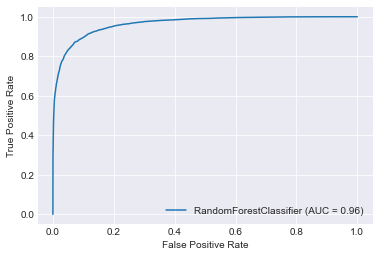

In [266]:
metrics.plot_roc_curve(rf, Xv, yv)  
plt.show()                                   

In [267]:
#get SHAP values to use to interpret/debug model
Xv_ = Xv
Xt_ = Xt
start = timer()
explainer = shap.TreeExplainer(rf, Xt_, feature_perturbation="interventional")
shap_values = explainer.shap_values(Xv_)
stop = timer()

100%|===================| 31266/31270 [101:54<00:00]       

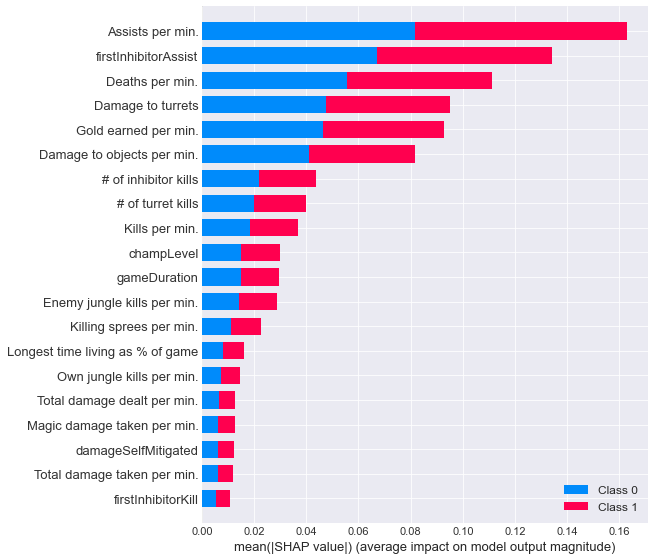

In [268]:
shap.summary_plot(shap_values, Xv)

XGBoost

In [382]:
#for XGBoost (win must be 0 or 1)
Xt_boost = Xt
Xv_boost = Xv
#I regret adding these, they are not helpful
Xt_boost.drop(['firstInhibitorAssist', 'champLevel', 'largestCriticalStrike', 'damageSelfMitigated'], axis=1, inplace=True)
Xv_boost.drop(['firstInhibitorAssist', 'champLevel', 'largestCriticalStrike', 'damageSelfMitigated'], axis=1, inplace=True)

dt = xgb.DMatrix(Xt, label=yt.values, enable_categorical=True)
dv = xgb.DMatrix(Xv, label=yv.values)

In [414]:
params = {
    "eta": 0.5,
    "max_depth": 4,
    "objective": "reg:logistic",
    "silent": 1,
    "base_score": np.mean(yt),
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 35, [(dt, "train"), (dv, "valid")], early_stopping_rounds=5, verbose_eval=35)

[22:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.50716	valid-logloss:0.50657
[34]	train-logloss:0.21984	valid-logloss:0.24164


In [415]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xv)

In [416]:
shap.force_plot(explainer.expected_value, shap_values[0,:-1], Xv.iloc[0,:-1])

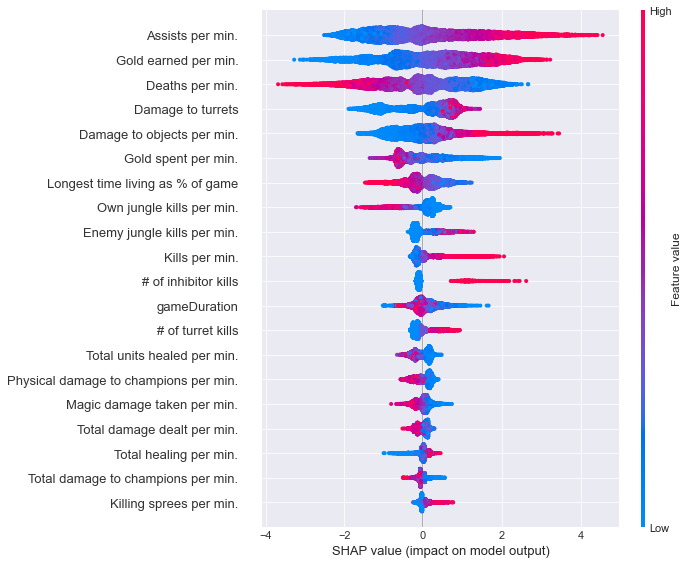

In [417]:
shap.summary_plot(shap_values, Xv)

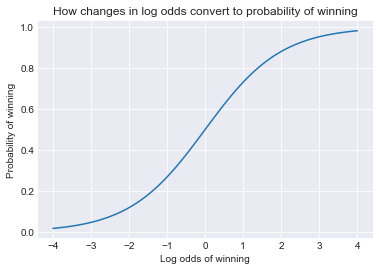

In [321]:
xs = np.linspace(-4,4,100)
pl.xlabel("Log odds of winning")
pl.ylabel("Probability of winning")
pl.title("How changes in log odds convert to probability of winning")
pl.plot(xs, 1/(1+np.exp(-xs)))
pl.show()

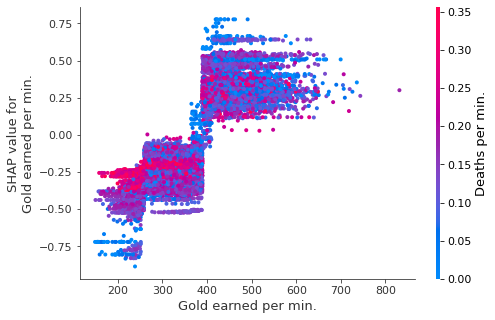

In [115]:
shap.dependence_plot("Gold earned per min.", shap_values, Xv, interaction_index="Deaths per min.")


In [ ]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, Xv)

In [ ]:
#Merge W/L matches w/ suffixes _W and _L respectively
df_d4 = pd.merge(df_d1,l_D,on='gameId',how='left', suffixes=['_W','_L'])